In [50]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=h5py.File('train_signs.h5','r')
train_orig_x=np.array(train['train_set_x'])
train_orig_y=np.array(train['train_set_y'])
print(train_orig_x.shape)
print(train_orig_y.shape)
test=h5py.File('test_signs.h5','r')
list(test.keys())
test_orig_x=np.array(test['test_set_x'])
test_orig_y=np.array(test['test_set_y'])
print('test_x shape is {} test_y shape is {}'.format(test_orig_x.shape,test_orig_y.shape))
#reshaping the data in the form of (nx,m) where m in number of examples
train_x_flat=train_orig_x.reshape(train_orig_x.shape[0],-1).T
test_x_flat=test_orig_x.reshape(test_orig_x.shape[0],-1).T
train_y=train_orig_y
test_y=test_orig_y
#reshaping the data 
train_x=train_x_flat/255.
test_x=test_x_flat/255.
print('train_x shape is {} test_x shape is {}'.format(train_x.shape,test_x.shape)) 

(1080, 64, 64, 3)
(1080,)
test_x shape is (120, 64, 64, 3) test_y shape is (120,)
train_x shape is (12288, 1080) test_x shape is (12288, 120)


In [3]:
#now choosing the train and test set for only 2 classes 2 class is taken as 1 and rest are 1,3,4 is taken as 0
train_cl_df=pd.DataFrame(train_orig_y,columns=['Class_labels'])
li_2_train=train_cl_df[train_cl_df.Class_labels==2].index.tolist()
train_orig_x_2=train_orig_x[li_2_train]


In [4]:
li_1_3_4_train=train_cl_df[train_cl_df.Class_labels.isin([1,3,4])].index.tolist()
train_orig_x_1_3_4=train_orig_x[li_1_3_4_train]


In [5]:
train_orig_2_1_3_4=np.concatenate((train_orig_x_2,train_orig_x_1_3_4),axis=0)

In [6]:
#doing random shuffling before flattening
np.random.seed(3)
shuffle=np.random.randint(0,720,size=720)
train_orig_2_1_3_4=train_orig_2_1_3_4[shuffle]


In [7]:
train_orig_x_2=train_orig_2_1_3_4.reshape(train_orig_2_1_3_4.shape[0],-1).T
train_orig_x_2#this is the train data with 2 classes 

array([[233, 227, 227, ..., 226, 236, 229],
       [227, 216, 218, ..., 218, 229, 221],
       [218, 204, 211, ..., 208, 220, 212],
       ..., 
       [200, 189, 193, ..., 204,  97, 142],
       [197, 182, 189, ..., 202,  84,  94],
       [187, 175, 181, ..., 201,  71,  60]], dtype=uint8)

In [8]:
train_y_2_1_3_4=np.concatenate((np.ones(180),np.zeros(540)))
train_orig_y_2=train_y_2_1_3_4[shuffle]

In [9]:
train_x_2=train_orig_x_2/255.0

In [10]:
#similarly preparing the test data 
test_cl_df=pd.DataFrame(test_orig_y,columns=['class_labels'])
li_test_2=test_cl_df[test_cl_df.class_labels==2].index.tolist()


In [11]:
li_test_1_3_4=test_cl_df[test_cl_df.class_labels.isin([1,3,4])].index.tolist()
test_orig_x_2=np.concatenate((test_orig_x[li_test_2],test_orig_x[li_test_1_3_4]),axis=0)

In [12]:
test_orig_y_2=np.concatenate((np.ones(20),np.zeros(60)),axis=0)

In [13]:
np.random.seed(3)
test_shuffle=np.random.randint(0,80,80)
test_shuffle

array([24,  3, 56, 72,  0, 21, 19, 74, 41, 10, 21, 38, 20, 44, 39, 14, 26,
       22, 66,  2, 63, 60,  1, 51, 69, 29, 24, 62,  7, 43, 33, 79, 48, 37,
       20, 49, 21, 78, 28, 54,  0, 64, 18, 63, 37, 56, 56, 71, 37, 46, 33,
        1, 74, 16, 32, 16, 18, 75, 55, 13, 37, 30, 48, 61, 33, 52,  2, 28,
       36, 44, 48, 59, 74, 54, 21, 56, 39, 29, 32, 48])

In [14]:
test_orig_x_2=test_orig_x_2[test_shuffle]
test_orig_y_2=test_orig_y_2[test_shuffle]


In [15]:
test_x_2=test_orig_x_2.reshape(test_orig_x_2.shape[0],-1).T
test_x_2=test_x_2/255.0

In [16]:
test_orig_y_2=test_orig_y_2.reshape(test_orig_y_2.shape[0],-1).T

In [17]:
train_orig_y_2=train_orig_y_2.reshape(train_orig_y_2.shape[0],-1).T


In [18]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

NameError: name 'load_dataset' is not defined

In [76]:
train_set_x_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T #each column is one image
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [77]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [78]:
train_set_x.shape
test_set_x.shape

(12288, 50)

In [79]:
test_set_y.shape
train_set_y.shape

(1, 209)

In [19]:
def sigmoid(z):
    x= 1/(1+np.exp(-z))
    return x
def initialize_parameters(dim):
    w=np.zeros([dim,1])
    b=0
    return w,b
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost = -(np.add(np.sum(np.dot(Y,np.log(A.T))),np.sum(np.dot(1-Y,np.log(1-(A.T)))))/X.shape[1])
    #backward propogation
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    grads={'dw':dw,'db':db}
    cost=np.squeeze(cost)
#     print('cost squeeze is {} and grads is {}'.format(np.squeeze(cost),grads))
    return grads,cost
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*(dw)
        b=b-learning_rate*(db)
        
        
        if((i%100)==0):
            print('appending costs')
            costs.append(cost)
        if ((print_cost) and i%100==0):
            print('cost at {}th iteration is {}'.format(i,cost))
            
    w_b_on_completion={'w':w,'b':b}
    grads_on_completion={'dw':dw,'db':db}
    return w_b_on_completion,grads_on_completion,costs
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction = np.zeros((1,m))
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if(A[0,i]<0.5):
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction       


In [24]:
def combined_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    w,b=initialize_parameters(X_train.shape[0])
    print(w.shape,b)
    w_complete,grad_complete,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost=True)
    w=w_complete['w']
    b=w_complete['b']
    predict_train=predict(w,b,X_train)
    predict_test=predict(w,b,X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(predict_test - Y_test)) * 100))
    return w_complete,costs

In [25]:
w_complete,costs=combined_model(train_x_2, train_orig_y_2, test_x_2, test_orig_y_2, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(12288, 1) 0
appending costs
cost at 0th iteration is 0.6931471805599452
appending costs
cost at 100th iteration is 2.5496276714637593
appending costs
cost at 200th iteration is 0.4406866934940048
appending costs
cost at 300th iteration is 1.7204665074275818
appending costs
cost at 400th iteration is 0.6873981423276135
appending costs
cost at 500th iteration is 1.850745862861499
appending costs
cost at 600th iteration is 1.6480126104871964
appending costs
cost at 700th iteration is 1.4642003731597264
appending costs
cost at 800th iteration is 0.4698303220888786
appending costs
cost at 900th iteration is 0.22238240106061688
appending costs
cost at 1000th iteration is 0.29890287619448197
appending costs
cost at 1100th iteration is 0.41268374065225716
appending costs
cost at 1200th iteration is 0.5365521122372108
appending costs
cost at 1300th iteration is 0.6684329275721818
appending costs
cost at 1400th iteration is 0.6157416895339834
appending costs
cost at 1500th iteration is 0.561227

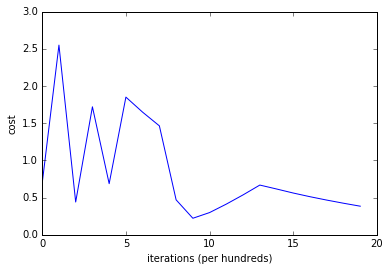

In [51]:
#plotting the costs
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [125]:
#checking for the correctness of dataset
list_2_train=[]
list_2_test=[]
for i in range(train_orig_y_2.shape[1]):
    if (train_orig_y_2[0][i]==1.0):
        list_2_train.append(i)
for j in range(test_orig_y_2.shape[1]):
    if(test_orig_y_2[0][j]==1.0):
        list_2_test.append(j)
#seems like a correct cone 

In [123]:
test_orig_y_2[0][1]
len(li_test_2)

1.0

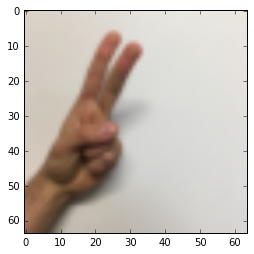

In [126]:
# plt.imshow(train_x_2[list_2[9]].reshape((64,64,3)))
# plt.imshow(train_x_2[:,list_2[67]].reshape((64,64,3)))
plt.imshow(test_x_2[:,list_2_test[3]].reshape((64,64,3)))

In [108]:
#Now need to map hidden layers to this dataset 
# train_x=train_x_2
# train_y=train_orig_y_2
# test_x=test_x_2
# test_y=test_orig_y_2